# Init and Parameters

In [6]:
import sys

sys.path.append("..")

from simulation_evaluation.microgrid_simulator import ControllEnvironment
from simulation_evaluation.microgrid_ga import MicrogridGA
from simulation_evaluation.microgrid_ga_v2 import MicrogridGA as MicrogridGAV2

day_nr=18
precision=1
battery_power=4.1
battery_max_discharge = 40.0
pv_scale=0.4
priorities=[1, 2, 3, 4, 5, 6, 7]
gens = 400
size = 2000
#Custom Utility Function
def evaluate_individual(individual):
    return sum(individual['Battery_SoC']) / 100.0 / 24.0

# Original GA Run 

In [2]:
##Extending the GA with prorietary Utility Calculation
#Set Size and Generation Count
my_ga = MicrogridGA(gens, size,day_nr=day_nr, precision=precision, battery_power=battery_power, 
                                               battery_max_discharge = battery_max_discharge, pv_scale=pv_scale,
                    priorities=priorities,step_type="percentage", mutate_chance=0.4, elit_perc=0.00)
#Redefine to new function
my_ga.evaluate_individual = evaluate_individual
my_ga.run()

🧬 GENERATION 0
Started:  2020-06-28 10:53:16.011182
Best Individual:  {'Nursery1_Lights_Quota': [1.0, 0.3, 0.1, 0.8, 0.4, 0.2, 0.2, 0.3, 0.6, 0.6, 0.3, 0.7, 0.0, 1.0, 0.2, 0.8, 0.8, 0.1, 0.3, 0.8, 0.9, 0.4, 0.9, 0.8], 'Nursery1_Sockets_Quota': [0.1, 0.1, 1.0, 0.6, 0.8, 0.3, 0.1, 0.9, 0.4, 0.5, 0.1, 0.7, 0.3, 0.0, 0.4, 0.7, 0.3, 0.8, 0.6, 0.4, 0.5, 0.3, 0.2, 0.7], 'Nursery2_Lights_Quota': [0.3, 0.2, 0.1, 0.9, 0.3, 0.6, 0.2, 0.9, 0.7, 0.9, 0.8, 0.9, 0.9, 0.3, 0.1, 0.0, 0.7, 0.4, 0.4, 0.9, 0.4, 0.1, 0.3, 0.8], 'Nursery2_Sockets_Quota': [0.9, 0.9, 0.7, 0.3, 0.8, 0.6, 0.2, 0.2, 0.2, 0.2, 0.7, 0.8, 0.5, 0.9, 0.7, 0.1, 0.8, 0.7, 0.0, 0.8, 0.9, 0.4, 0.5, 0.6], 'Playground_Lights_Quota': [0.0, 0.7, 0.0, 0.1, 0.5, 0.5, 0.6, 0.3, 0.4, 0.3, 0.7, 0.1, 0.8, 0.7, 0.1, 0.2, 0.5, 0.7, 0.2, 0.5, 0.7, 0.9, 0.3, 0.6], 'Playground_Sockets_Quota': [0.0, 0.5, 0.4, 0.8, 1.0, 0.9, 0.6, 0.1, 0.1, 0.1, 0.4, 0.4, 0.9, 0.4, 0.6, 0.4, 0.5, 0.0, 0.4, 0.4, 0.3, 0.5, 0.7, 0.9], 'Streetlights_Quota': [0.2, 0.4, 0.3, 0.

# Modified GA RUN

In [7]:
##Extending the GA with prorietary Utility Calculation
#Set Size and Generation Count
my_ga2 = MicrogridGAV2(gens, size,day_nr=day_nr, precision=precision, battery_power=battery_power, 
                                               battery_max_discharge = battery_max_discharge, pv_scale=pv_scale,
                    priorities=priorities,step_type="percentage", mutate_chance=0.4, elit_perc=0.10
                    ,cross_perc=0.15,mutate_perc=0.15,corrs_mut_perc=0.10)
#Redefine to new function
my_ga2.evaluate_individual = evaluate_individual
my_ga2.run()

🧬 GENERATION 0
Started:  2020-06-28 14:03:03.721522
Sizes - Original: 2000  Elit: 200  Cross: 300  Mut: 300  CrossMut: 200  Random: 1000
Best Individual:  {'Nursery1_Lights_Quota': [0.7, 0.3, 0.5, 1.0, 0.4, 0.3, 0.2, 0.3, 0.4, 0.5, 0.4, 0.1, 0.7, 0.1, 0.6, 0.1, 0.8, 0.0, 0.9, 1.0, 0.9, 0.5, 0.5, 0.9], 'Nursery1_Sockets_Quota': [0.6, 0.4, 1.0, 0.5, 0.8, 0.3, 0.8, 0.5, 0.5, 0.8, 0.0, 0.4, 0.5, 0.7, 0.1, 0.7, 0.0, 0.9, 0.6, 0.6, 0.1, 0.8, 0.3, 0.2], 'Nursery2_Lights_Quota': [0.6, 0.8, 0.3, 0.2, 0.8, 0.4, 0.6, 0.1, 0.4, 0.2, 0.6, 0.0, 0.2, 0.4, 0.7, 0.2, 0.8, 0.7, 0.3, 0.7, 0.5, 0.4, 0.6, 0.7], 'Nursery2_Sockets_Quota': [0.5, 0.5, 0.6, 0.4, 0.6, 0.5, 0.1, 0.0, 0.5, 0.2, 0.5, 0.3, 0.5, 0.3, 0.9, 0.4, 0.8, 0.1, 0.4, 0.1, 0.6, 0.4, 0.9, 0.2], 'Playground_Lights_Quota': [0.2, 1.0, 0.9, 0.9, 0.4, 0.8, 0.6, 0.8, 0.3, 0.4, 0.2, 0.3, 0.7, 0.7, 1.0, 1.0, 0.4, 0.1, 1.0, 0.3, 0.3, 0.0, 0.2, 0.2], 'Playground_Sockets_Quota': [0.4, 0.1, 0.7, 1.0, 0.1, 0.3, 0.1, 0.9, 0.1, 0.3, 0.1, 0.0, 0.4, 0.1, 0.1, 0

KeyboardInterrupt: 

# GA Display 

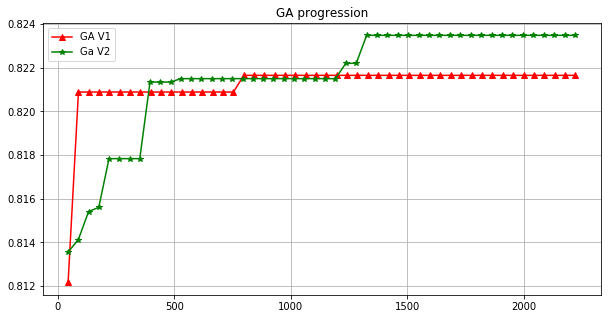

In [4]:
import pandas as pd
import random
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
f_size = (10,5)

ga_util = [my_ga.history[x][0] for x in my_ga.history]
ga_time = [my_ga.history[x][2] for x in my_ga.history]
ga2_util = [my_ga2.history[x][0] for x in my_ga2.history]
ga2_time = [my_ga2.history[x][2] for x in my_ga2.history]

fig,ax = plt.subplots(1,1,figsize=f_size)
plt.title("GA progression")
ax.plot(ga_time,ga_util,'r-^', label="GA V1")
ax.plot(ga2_time,ga2_util,'g-*',label="Ga V2")
ax.legend(loc="upper left")
ax.grid()
plt.show()

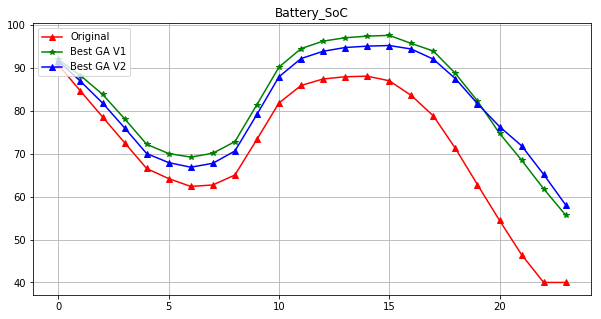

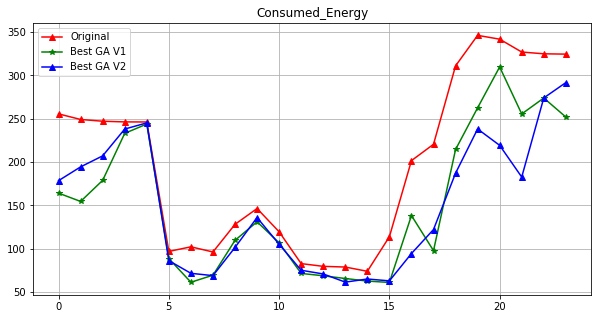

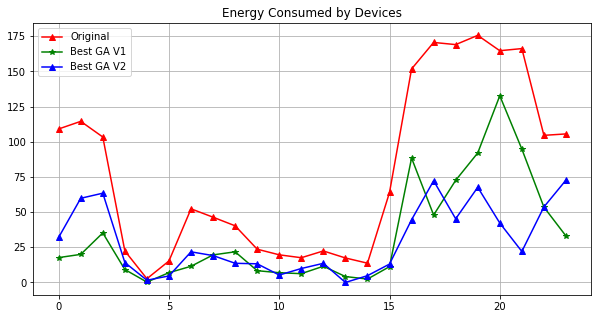

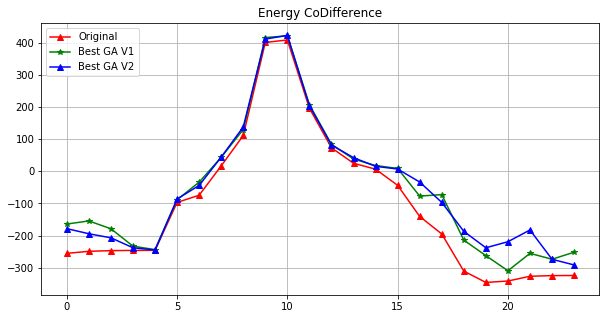

In [5]:
ga_orig_indi = my_ga.get_original()
ga_best_indi = my_ga.get_deployed_best()
ga2_best_indi = my_ga2.get_deployed_best()


parameters = ["Battery_SoC","Consumed_Energy"]
for p in parameters:    
    fig,ax = plt.subplots(1,1,figsize=f_size)
    plt.title(p)
    ax.plot(ga_orig_indi.index,ga_orig_indi[p],'r-^', label="Original")
    ax.plot(ga_best_indi.index,ga_best_indi[p],'g-*',label="Best GA V1")
    ax.plot(ga2_best_indi.index,ga2_best_indi[p],'b-^',label="Best GA V2")
    ax.legend(loc="upper left")
    ax.grid()
    plt.show()

#Device Energy
fig,ax = plt.subplots(1,1,figsize=f_size)
plt.title("Energy Consumed by Devices")
ax.plot(ga_orig_indi.index,ga_orig_indi["Consumed_Energy"]-ga_orig_indi["System_Load"],'r-^', label="Original")
ax.plot(ga_best_indi.index,ga_best_indi["Consumed_Energy"]-ga_best_indi["System_Load"],'g-*',label="Best GA V1")
ax.plot(ga2_best_indi.index,ga2_best_indi["Consumed_Energy"]-ga2_best_indi["System_Load"],'b-^',label="Best GA V2")
ax.legend(loc="upper left")
ax.grid()
plt.show()

#Energy Gen/Consumption Difference 
fig,ax = plt.subplots(1,1,figsize=f_size)
plt.title("Energy Gen/Cons Difference")
ax.plot(ga_orig_indi.index,ga_orig_indi["Generated_Energy"]-ga_orig_indi["Consumed_Energy"],'r-^', label="Original")
ax.plot(ga_best_indi.index,ga_best_indi["Generated_Energy"]-ga_best_indi["Consumed_Energy"],'g-*',label="Best GA V1")
ax.plot(ga2_best_indi.index,ga2_best_indi["Generated_Energy"]-ga2_best_indi["Consumed_Energy"],'b-^',label="Best GA V2")
ax.legend(loc="upper left")
ax.grid()
plt.show()